In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [204]:
#Read Data from drive
df = pd.read_excel('/content/drive/My Drive/Week2_challenge_data_source.xlsx')

In [3]:
df.head() #Print the top 5 row

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322

In [6]:
df.isnull().sum()[5:] #Check the number of rows per column

Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)                           792
HTTP DL (Bytes)                

In [7]:
###Drop missing values in MSISDN/Number column
df = df.dropna(axis=0, subset=['MSISDN/Number'])

In [8]:
num_cols = df._get_numeric_data().columns #Get all numeric columns

In [9]:
from sklearn.impute import SimpleImputer 

In [10]:
impute = SimpleImputer()

In [11]:
df[num_cols] = impute.fit_transform(df[num_cols]) #impute the missing values of numeric columns with mean

In [12]:
df['Last Location Name'] = df['Last Location Name'].fillna(df['Last Location Name'].mode()[0]) #fill categorical column with mode

In [13]:
df.shape

(148935, 55)

Top 10 handset used

In [14]:
df['Handset Type'].value_counts(ascending = False).head(10)

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: Handset Type, dtype: int64

Top 3 Handset Manufacturer

In [15]:
df['Handset Manufacturer'].value_counts(ascending = False)[:3]

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

Top 5 Handset per Handset Manufacturer

In [16]:
keys = df['Handset Manufacturer'].value_counts(ascending = False)[:3].keys()

In [17]:
for key in keys:
  top_5 = df[df['Handset Manufacturer'] == key]['Handset Type'].value_counts()[:5]
  print(f'Top 5 {key} handset and count: \n{top_5}\n')

Top 5 Apple handset and count: 
Apple iPhone 6S (A1688)    9413
Apple iPhone 6 (A1586)     9012
Apple iPhone 7 (A1778)     6304
Apple iPhone Se (A1723)    5176
Apple iPhone 8 (A1905)     4985
Name: Handset Type, dtype: int64

Top 5 Samsung handset and count: 
Samsung Galaxy S8 (Sm-G950F)    4480
Samsung Galaxy A5 Sm-A520F      3708
Samsung Galaxy J5 (Sm-J530)     3682
Samsung Galaxy J3 (Sm-J330)     3464
Samsung Galaxy S7 (Sm-G930X)    3176
Name: Handset Type, dtype: int64

Top 5 Huawei handset and count: 
Huawei B528S-23A                  19727
Huawei E5180                       2074
Huawei P20 Lite Huawei Nova 3E     2018
Huawei P20                         1479
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64



from the analysis conducted, we can infer that most of the customers use the Apple brand while Huawei B528S-23A is the most used handset by customers. The marketing teams should target The Top Apple, Samsung handset and also the Huawei B528S-23A for ads and/or promotions.



---



---

Aggregate per user number of xDR sessions,Session duration, total download (DL) and upload (UL) data, the total data volume (in Bytes) during this session for each application

In [212]:
#Total Ul+Dl
df['TotalUl/Dl'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
df['Social'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

In [19]:
df_agg = df.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',
                                 'TotalUl/Dl':'sum','Social':'sum','Google':'sum', 'Email':'sum','Youtube':'sum','Netflix':'sum',
                                 'Gaming':'sum'})

In [20]:
df_agg.reset_index(inplace = True); df_agg.head()

,MSISDN/Number,Bearer Id,Dur. (ms).1,TotalUl/Dl,Social,Google,Email,Youtube,Netflix,Gaming
0,3.360100e+10,1,116720140.0,8.786906e+08,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08
1,3.360100e+10,1,181230963.0,1.568596e+08,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08
2,3.360100e+10,1,134969374.0,5.959665e+08,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08
3,3.360101e+10,1,49878024.0,4.223207e+08,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08
4,3.360101e+10,2,37104453.0,1.457411e+09,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09


Non Graphical Univariate Analysis of important features

In [21]:
df[['TotalUl/Dl', 'Social','Dur. (ms).1',
      'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']].describe()

,TotalUl/Dl,Social,Dur. (ms).1,Google,Email,Youtube,Netflix,Gaming,Other
count,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
mean,4.957428e+08,1.828083e+06,1.048707e+08,7.807791e+06,2.259158e+06,2.264212e+07,2.262772e+07,4.303147e+08,4.294105e+08
std,2.443876e+08,1.035623e+06,8.106342e+07,3.517034e+06,1.071113e+06,9.247278e+06,9.260256e+06,2.440281e+08,2.432608e+08
min,2.895611e+07,1.563000e+03,7.142988e+06,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05
25%,2.844641e+08,9.321130e+05,5.788424e+07,4.944102e+06,1.359338e+06,1.599374e+07,1.597990e+07,2.187082e+08,2.185946e+08
50%,4.968460e+08,1.825624e+06,8.639998e+07,7.814744e+06,2.263969e+06,2.266270e+07,2.263279e+07,4.315884e+08,4.300767e+08
75%,7.064483e+08,2.727491e+06,1.327006e+08,1.068314e+07,3.160011e+06,2.929524e+07,2.928762e+07,6.414080e+08,6.399145e+08
max,9.559848e+08,3.650861e+06,1.859336e+09,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08


Averagely customers use about 4.957428 bytes per session ....


Conduct graphical univariate analysis

In [22]:
columns = ['TotalUl/Dl', 'Social','Dur. (ms).1',
      'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

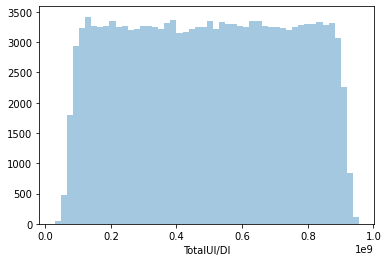

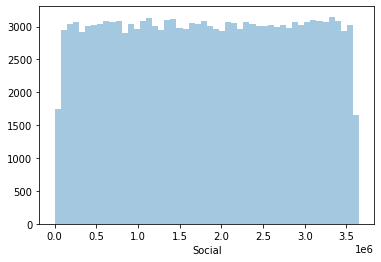

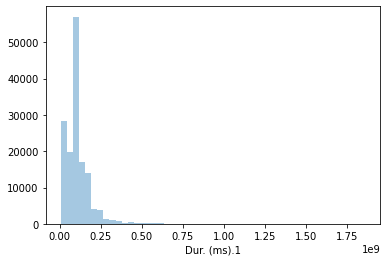

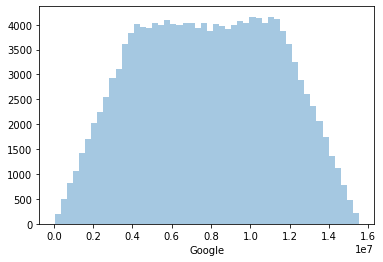

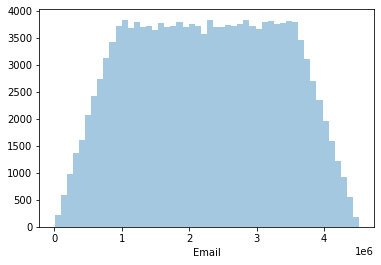

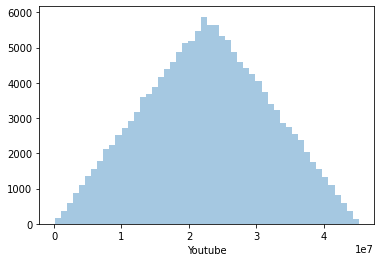

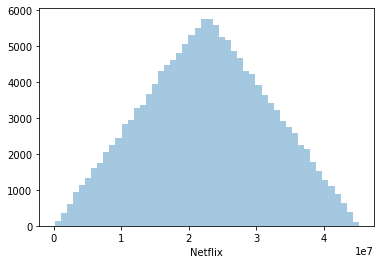

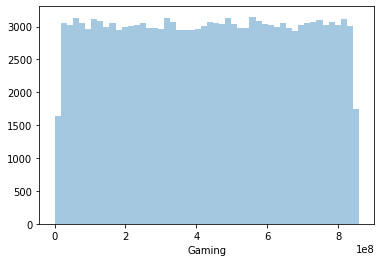

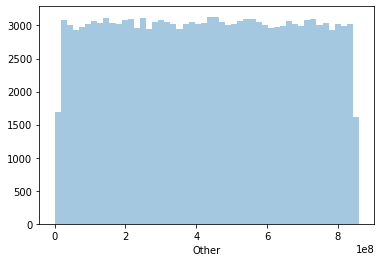

In [23]:
for cols in columns:
  sns.distplot(df[cols], kde = False)
  plt.show()

Graphical Bivariate analysis between total Ul/Dl and the applications

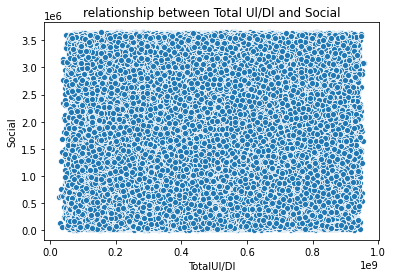

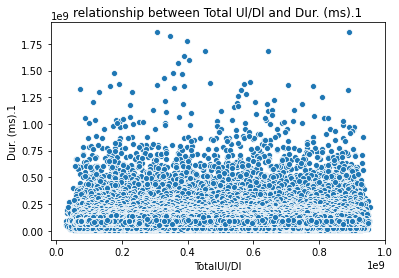

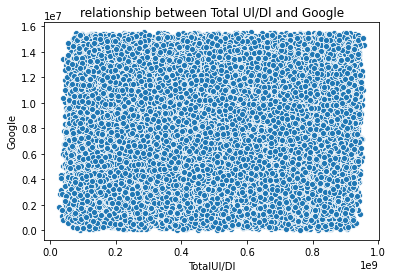

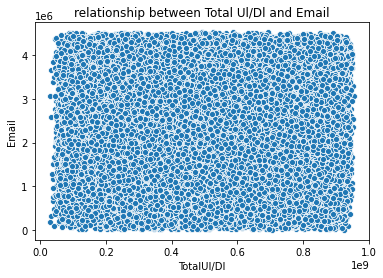

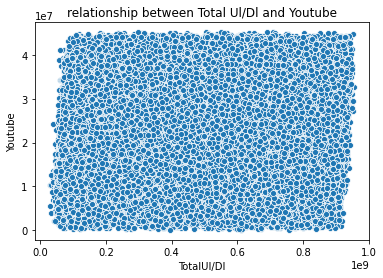

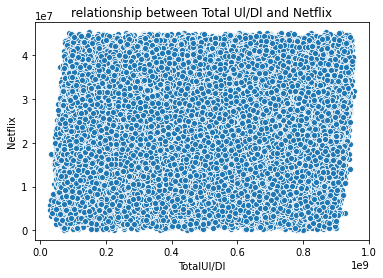

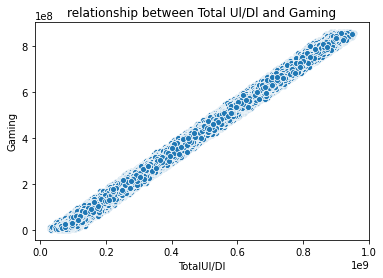

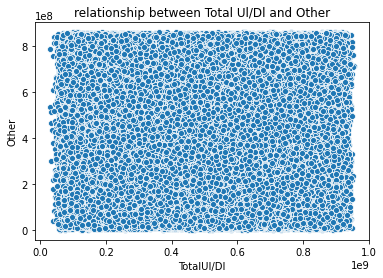

In [24]:
for cols in columns[1:]:
  sns.scatterplot(df['TotalUl/Dl'], df[cols])
  plt.title(f'relationship between Total Ul/Dl and {cols}')
  plt.show();

There is a positive linear relationship between Total Ul/Dl and gGaming which is almost perfect

segment the users into top five decile classes
based on the total duration for all sessions and compute the total data
(DL+UL) per decile class

In [104]:
decile1 = df_agg[['MSISDN/Number', 'Dur. (ms).1', 'TotalUl/Dl']]

In [105]:
decile1 = decile1.sort_values(by = 'Dur. (ms).1', ascending = False, ignore_index= True)

In [106]:
decile1['decile'] = pd.qcut(decile1['Dur. (ms).1'], 10, labels = False)

In [107]:
decile1 = decile1[decile1.decile >4]

In [108]:
decile1.groupby('decile')['TotalUl/Dl'].sum()

decile
5    6.426251e+12
6    6.151240e+12
7    7.823100e+12
8    9.305867e+12
9    1.486393e+13
Name: TotalUl/Dl, dtype: float64

In [109]:
dec1 = decile1.groupby('decile')['TotalUl/Dl'].sum().reset_index()

In [110]:
dec1

,decile,TotalUl/Dl
0,5,6.426251e+12
1,6,6.151240e+12
2,7,7.823100e+12
3,8,9.305867e+12
4,9,1.486393e+13


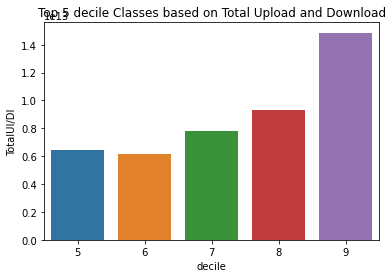

In [111]:
sns.barplot(dec1.decile, dec1['TotalUl/Dl'])
plt.title('Top 5 decile Classes based on Total Upload and Download');

Correlation Analysis

In [112]:
corr1 = df[['TotalUl/Dl', 'Social','Dur. (ms).1',
      'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]

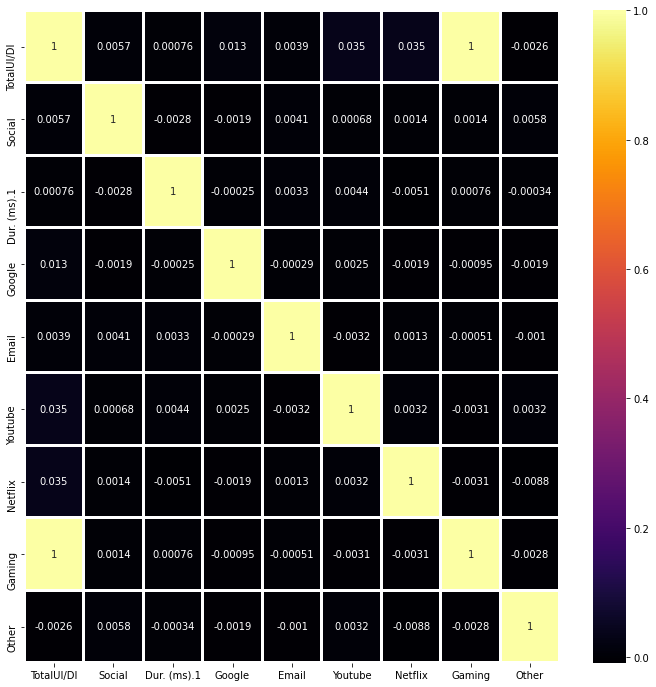

In [113]:
plt.figure(figsize = (12,12))
sns.heatmap(corr1.corr(), annot= True, cmap = 'inferno', linewidth = 2 );

There is a perfect positive relationship between Gaming and Total Upload and Download. all other correlations are negligible as they're very close to zero

---

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of
the results.

In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [115]:
#Drop newly created columns that may have high correlation with existing one
df_2 = df.drop(['TotalUl/Dl', 'Social',
       'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other'], axis =1)

In [116]:
num_cols = df_2._get_numeric_data().columns

In [117]:
#Standardize and normalize data
P = PowerTransformer()
scaled_df = P.fit_transform(df_2[num_cols])
df2 = pd.DataFrame(scaled_df, columns=[num_cols])

Text(0, 0.5, '‘cumulative explained variance’')

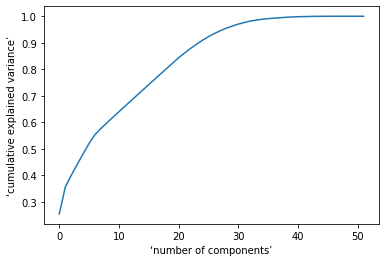

In [118]:
pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('‘number of components’')
plt.ylabel('‘cumulative explained variance’')

around 90% of the variability is explained by approximately 25 components

In [119]:
pca = PCA(n_components = 25)
scaled_df = pca.fit_transform(df_2[num_cols])

In [120]:
pca.components_

array([[-1.55431223e-14, -1.00089602e-15, -2.11433422e-10, ...,
         3.52561261e-13,  4.03181503e-07,  3.72944727e-10],
       [-1.19586989e-13, -2.22266650e-13,  8.26541144e-10, ...,
        -1.86506370e-14, -2.13152310e-08, -4.03381741e-11],
       [-5.88538243e-11,  7.86239731e-11,  1.49094190e-07, ...,
         4.90218298e-12,  1.05759227e-06,  3.91588395e-10],
       ...,
       [ 1.21976689e-06,  4.54109107e-07, -4.04137152e-09, ...,
         1.00984183e-05, -8.07208697e-07, -1.07628226e-04],
       [-9.84112002e-07,  4.26172206e-06, -5.18415081e-07, ...,
        -5.53692317e-04,  1.45544743e-05,  7.39548766e-01],
       [ 3.89208715e-06, -5.65797878e-05,  5.08245986e-08, ...,
        -3.42298459e-05,  7.12048143e-07, -5.48417517e-04]])

In [121]:
df2 = pd.DataFrame(pca.components_ , columns=[num_cols]); df2.head()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),RTT,TCP,TP
0,-1.554312e-14,-1.000896e-15,-2.114334e-10,-0.000004,6.298674e-04,9.999998e-01,-8.685350e-14,4.394148e-13,3.232408e-10,4.970397e-11,3.915340e-07,1.164754e-08,-1.847233e-13,5.173859e-14,5.175422e-14,6.606705e-14,-4.088019e-14,2.148487e-14,6.192718e-15,3.232754e-15,2.567529e-06,6.762396e-08,1.036370e-07,7.591359e-08,-2.114315e-07,1.455830e-11,4.636369e-12,1.191508e-11,6.711159e-13,1.296288e-11,1.325615e-12,1.994349e-10,2.083274e-10,-3.181243e-12,-4.290587e-12,-3.153731e-10,3.126711e-10,-1.867325e-10,3.961863e-11,3.908566e-10,-1.513618e-10,-4.926874e-10,-1.287408e-09,2.068578e-08,7.600382e-10,4.558454e-08,1.352362e-10,-1.954963e-10,2.007866e-08,3.525613e-13,4.031815e-07,3.729447e-10
1,-1.195870e-13,-2.222666e-13,8.265411e-10,-0.004121,9.999913e-01,-6.298768e-04,4.588764e-15,-2.323940e-14,-3.529215e-11,-5.046022e-12,-2.069939e-08,-6.158410e-10,1.954480e-14,-6.925871e-15,-5.084598e-15,-5.696377e-15,2.715389e-15,-1.428546e-15,-3.833159e-16,-2.008214e-16,-1.357473e-07,-3.575741e-09,-7.990145e-09,-5.945280e-09,8.265406e-07,-7.696577e-13,-2.450881e-13,-6.299229e-13,-3.548406e-14,-6.853171e-13,-7.009533e-14,-1.547483e-11,-1.235582e-11,-7.862381e-10,1.024956e-11,1.188378e-09,9.806703e-10,1.177713e-09,2.877549e-10,9.150201e-09,1.422160e-08,9.285422e-09,1.002519e-10,-3.617300e-07,6.818837e-09,-1.384308e-07,2.573061e-09,2.499242e-08,-3.417146e-07,-1.865064e-14,-2.131523e-08,-4.033817e-11
2,-5.885382e-11,7.862397e-11,1.490942e-07,-0.999991,-4.120724e-03,-9.689669e-07,7.754329e-12,-2.852146e-12,4.557599e-10,-6.417155e-11,6.534064e-07,4.041859e-07,-3.178667e-13,2.046370e-13,1.644651e-14,4.804791e-14,-4.744433e-13,2.583534e-13,5.953506e-14,4.261125e-14,9.685046e-06,-6.920739e-07,6.055739e-08,-6.905170e-07,1.490942e-04,-4.827652e-11,-1.325698e-11,-4.510191e-11,2.273605e-12,-2.343586e-12,-2.212360e-13,-6.605863e-09,-5.623375e-09,-1.687316e-07,4.628551e-09,5.296342e-07,1.766611e-08,-2.225436e-07,6.829140e-08,-4.896333e-07,-2.484105e-06,-1.883763e-07,5.987665e-07,-8.290038e-05,1.343144e-06,2.812814e-05,-7.500044e-07,-1.201613e-06,-8.344003e-05,4.902183e-12,1.057592e-06,3.915884e-10
3,1.067670e-09,1.020372e-09,2.222497e-06,0.000011,1.750294e-07,-2.582730e-06,-9.357815e-10,5.990878e-10,2.379758e-06,4.044402e-07,1.980728e-02,1.321986e-04,-1.567344e-09,-5.392148e-11,2.824180e-10,1.336607e-09,-5.414356e-10,4.443508e-10,5.825520e-11,2.622651e-11,9.995154e-01,1.234801e-02,1.346645e-03,9.131490e-04,2.222501e-03,5.944045e-07,2.104538e-07,1.959321e-07,1.700829e-08,1.729032e-07,3.637846e-08,1.231830e-06,1.785356e-06,6.193848e-07,3.848499e-08,-2.170056e-06,-3.193995e-08,1.106009e-06,-4.355769e-07,9.803710e-06,-2.304460e-05,-4.237357e-05,-4.283555e-05,-2.571690e-03,1.245906e-05,2.371044e-03,9.572734e-06,-4.427739e-05,-2.604704e-03,-3.366937e-10,1.993948e-02,2.784198e-06
4,-3.701484e-09,-4.045502e-09,2.868452e-07,-0.000118,1.226458e-08,-3.782983e-08,-4.039172e-09,5.162138e-10,-8.847112e-08,-8.409313e-09,-8.2

In [206]:
df2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Start ms,-1.554312e-14,-1.195870e-13,-5.885382e-11,1.067670e-09,-3.701484e-09,4.724472e-09,-5.105548e-10,4.238492e-09,-3.221052e-08,2.859173e-09,-5.574678e-09,5.377589e-08,1.741236e-08,1.402095e-07,1.076212e-08,4.609924e-08,-2.646789e-07,-1.891709e-07,-1.533910e-07,-1.380923e-07,-3.697113e-07,-2.287534e-09,1.219767e-06,-9.841120e-07,3.892087e-06
End ms,-1.000896e-15,-2.222666e-13,7.862397e-11,1.020372e-09,-4.045502e-09,-3.082665e-09,4.424892e-09,-4.512917e-09,-3.360043e-08,1.993183e-08,-8.713417e-08,-9.339224e-09,-2.258734e-07,-7.331388e-08,-1.469527e-08,2.116351e-07,-7.840697e-08,1.168675e-07,-2.829393e-07,-8.795069e-07,-6.608505e-08,-1.030447e-06,4.541091e-07,4.261722e-06,-5.657979e-05
Dur. (ms),-2.114334e-10,8.265411e-10,1.490942e-07,2.222497e-06,2.868452e-07,6.058483e-08,7.246531e-06,9.999560e-04,-5.454054e-07,-1.520736e-07,-1.917155e-06,1.083319e-07,-2.039731e-07,5.379066e-07,-5.020034e-06,-1.716112e-07,8.765475e-09,1.431091e-08,-3.039762e-07,-4.827294e-08,8.125330e-09,-5.673644e-08,-4.041372e-09,-5.184151e-07,5.082460e-08
IMSI,-3.564515e-06,-4.120723e-03,-9.999915e-01,1.053339e-05,-1.176505e-04,-2.764703e-05,1.669779e-06,1.490979e-04,3.860365e-07,1.526259e-06,-1.138480e-06,5.119224e-07,-2.706035e-07,-2.121347e-06,-8.286284e-07,1.027035e-06,1.478624e-06,-5.473291e-07,-6.128768e-07,-4.379420e-08,3.356600e-07,-4.489661e-08,-7.338118e-08,9.256756e-09,4.946256e-09
MSISDN/Number,6.298674e-04,9.999913e-01,-4.120724e-03,1.750294e-07,1.226458e-08,-2.541577e-07,2.622911e-08,-2.126405e-07,2.873309e-09,3.403758e-08,-4.082194e-10,2.154735e-08,-6.239343e-10,-1.717934e-08,-1.035718e-08,2.647491e-09,3.214253e-09,-2.390553e-09,-2.685959e-09,7.394692e-10,1.538567e-09,-1.536639e-09,-6.062587e-12,2.600014e-11,9.398200e-12
IMEI,9.999998e-01,-6.298768e-04,-9.689669e-07,-2.582730e-06,-3.782983e-08,4.311022e-08,-4.887930e-07,2.218757e-07,-1.281985e-08,6.264129e-11,-4.778902e-08,-7.262623e-10,-4.597557e-09,-2.351761e-08,1.122779e-07,-1.635536e-09,-9.078061e-10,-1.876683e-10,6.447819e-09,3.647886e-10,-2.405213e-10,1.242514e-10,3.117078e-11,-2.593930e-10,5.903014e-12
Avg RTT DL (ms),-8.685350e-14,4.588764e-15,7.754329e-12,-9.357815e-10,-4.039172e-09,3.281563e-09,-1.043303e-08,-2.854427e-07,-2.159308e-08,1.069933e-07,-9.247242e-08,9.615693e-08,-2.733011e-08,7.636947e-07,-5.803764e-07,-3.224388e-07,-7.940992e-07,-1.813729e-07,-1.994458e-06,-1.838482e-06,1.321785e-06,-1.924760e-06,1.004885e-05,-5.498064e-04,-2.009134e-05
Avg RTT UL (ms),4.394148e-13,-2.323940e-14,-2.852146e-12,5.990878e-10,5.162138e-10,1.380787e-10,2.335934e-09,4.636625e-09,5.131172e-08,-1.094198e-08,5.728818e-08,1.229680e-08,4.799920e-09,1.147692e-07,-5.800719e-07,-7.984162e-09,3.643389e-08,-6.937569e-09,7.832767e-08,-8.145987e-08,-1.044504e-07,6.938384e-08,4.956665e-08,-3.885873e-06,-1.413851e-05
Avg Bearer TP DL (kbps),3.232408e-10,-3.529215e-11,4.557599e-10,2.379758e-06,-8.847112e-08,-5.393542e-07,6.437499e-06,-4.455131e-05,6.552072e-06,-4.929909e-06,1.079557e-04,-1.250735e-05,2.590047e-05,1.995806e-04,-1.097490e-03,9.336346e-06,6.145189e-06,2.402025e-05,-3.925624e-04,3.704855e-05,5.255870e-05,7.595544e-05,-7.638668e-05,6.670656e-01,-8.595344e-04
Avg Bearer TP UL (kbps),4.970397e-11,-5.046022e-12,-6.417155e-11,4.044402e-07,-8.409313e-09,-1.057047e-07,1.015179e-06,-5.843560e-06,6.490927e-06,-4.919265e-07,4.572706e-05,-3.429460e-06,6.324185e-06,4.009837e-05,-2.071818e-04,6.886530e-07,2.140747e-06,4.174098e-07,5.829422e-06,-3.014073e-06,1.310672e-05,3.030541e-06,-3.124155e-05,7.248314e-02,3.111168e-04


25 components accounts for about 90% or greater of the variation in the dataset. Each column contain the correlation of the component and the row name.

Relationship between Upload and Download per Application and session duration

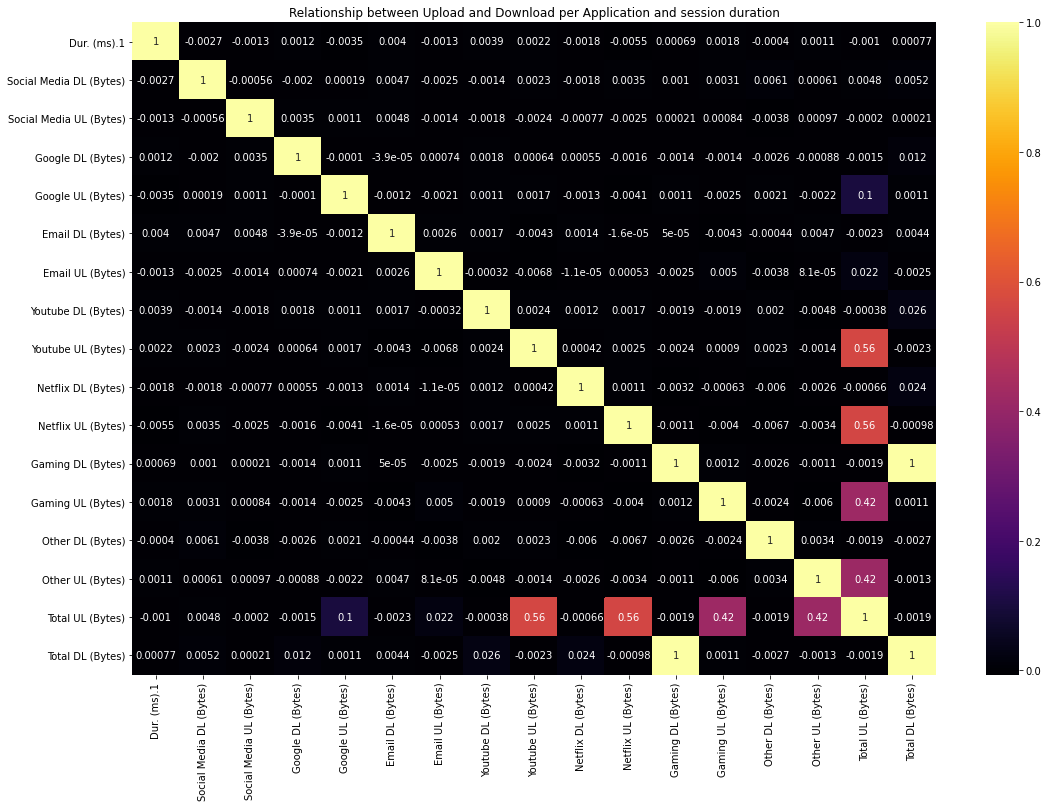

In [214]:
corr2 = df[['Dur. (ms).1','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']]
plt.figure(figsize = (18,12))
plt.title("Relationship between Upload and Download per Application and session duration")
sns.heatmap(corr2.corr(), annot= True, cmap = 'inferno' );

Relationship between Vol Ul/Dl of network speed and session duration

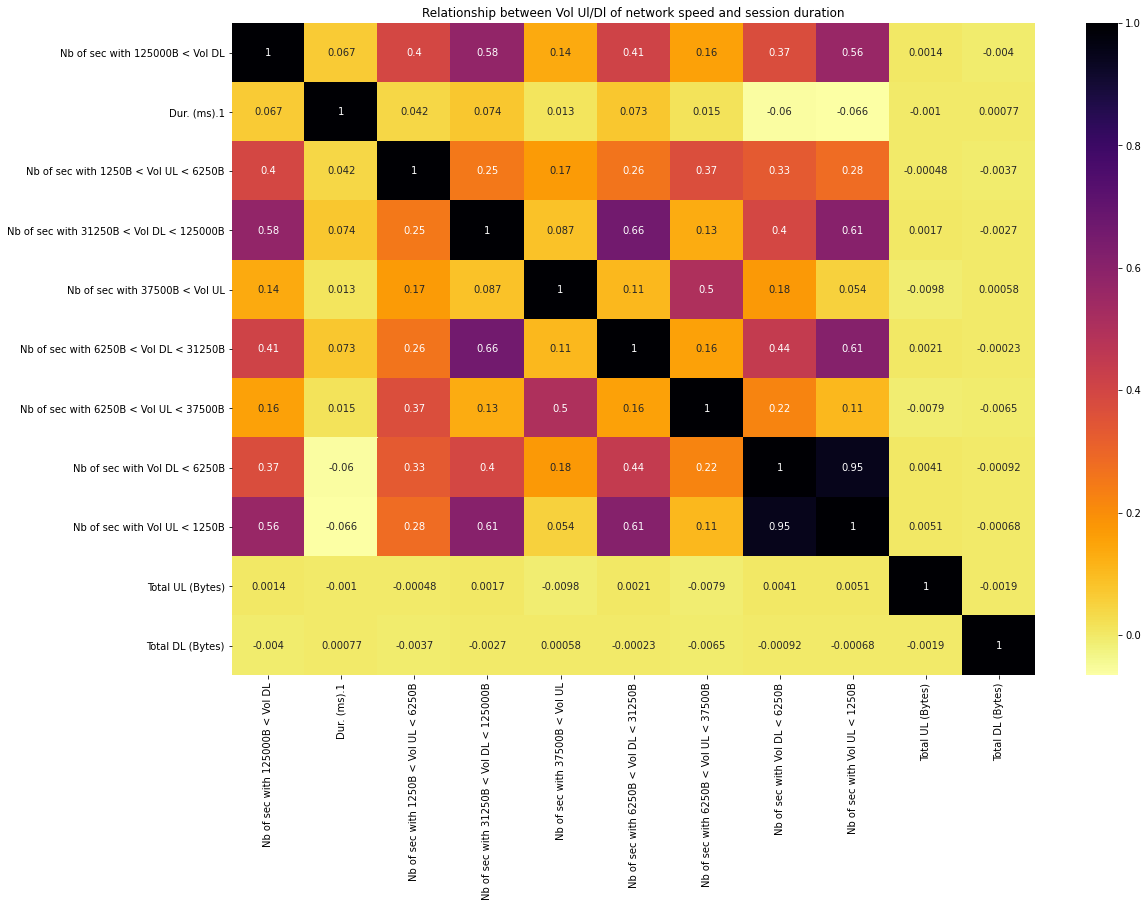

In [209]:
corr3 = df[['Nb of sec with 125000B < Vol DL', 'Dur. (ms).1',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B','Total UL (Bytes)', 'Total DL (Bytes)']]
plt.figure(figsize = (18,12))
plt.title("Relationship between Vol Ul/Dl of network speed and session duration")
sns.heatmap(corr3.corr(), annot= True, cmap = 'inferno_r' );

Relationship betwwen vol Ul/Dl per sec and total Ul/Dl per application

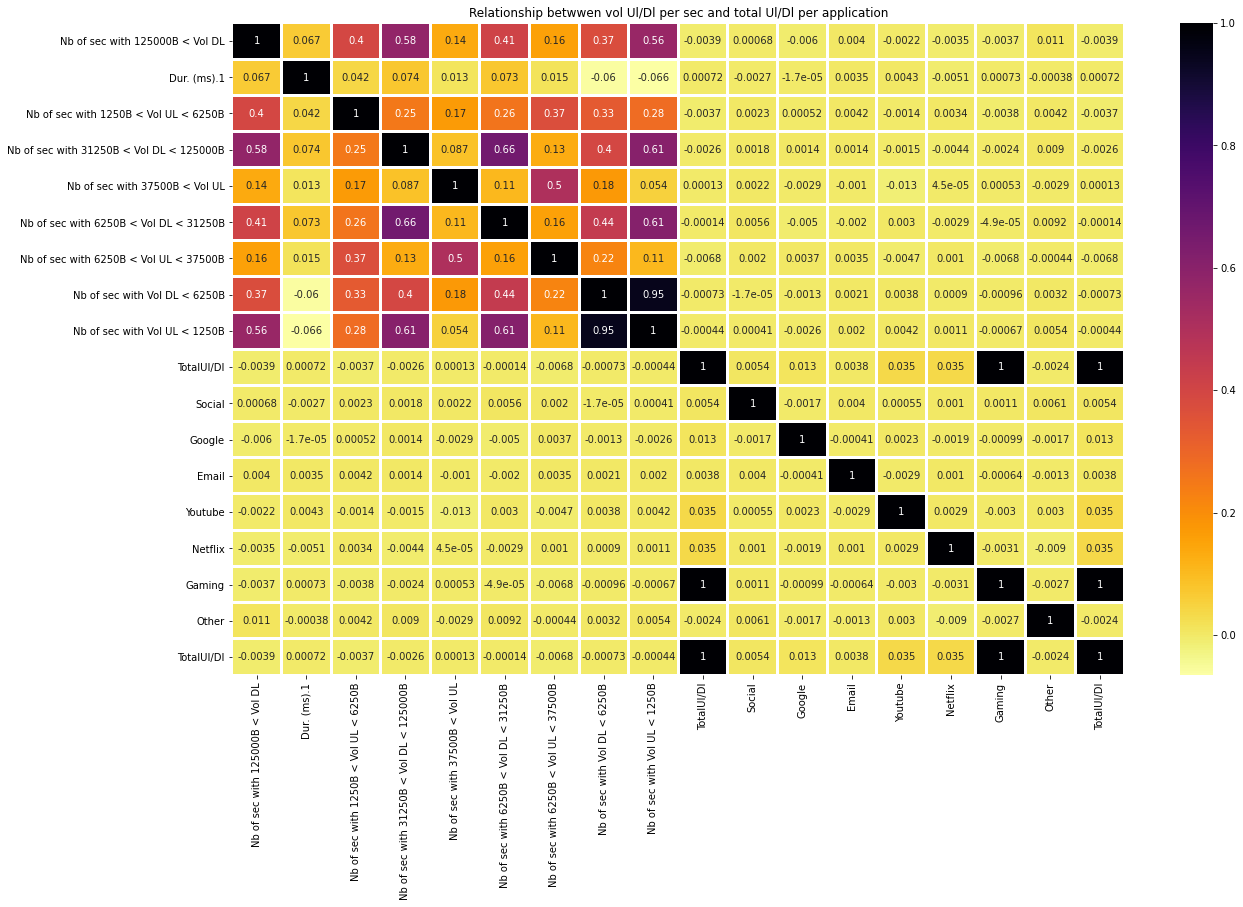

In [213]:
corr5 = df[['Nb of sec with 125000B < Vol DL', 'Dur. (ms).1',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
        'TotalUl/Dl', 'Social',
      'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other','TotalUl/Dl']]
plt.figure(figsize = (20,12))
plt.title("Relationship betwwen vol Ul/Dl per sec and total Ul/Dl per application")
sns.heatmap(corr5.corr(), annot= True, cmap = 'inferno_r', linewidths=2 );

# User Engagement Analysis

Aggregate the metrics per customer id (MSISDN) and report the top 10
customers per engagement metric

In [139]:
v =df.groupby("MSISDN/Number").agg({"Bearer Id": "count", 'Dur. (ms).1':'sum', 'TotalUl/Dl':'sum'})
df_task2 = pd.DataFrame(v) ; df_task2.reset_index(inplace=True)

In [140]:
df_task2.head()

,MSISDN/Number,Bearer Id,Dur. (ms).1,TotalUl/Dl
0,3.360100e+10,1,116720140.0,8.786906e+08
1,3.360100e+10,1,181230963.0,1.568596e+08
2,3.360100e+10,1,134969374.0,5.959665e+08
3,3.360101e+10,1,49878024.0,4.223207e+08
4,3.360101e+10,2,37104453.0,1.457411e+09


In [141]:
####Users with top 10 higest number of Sessions
for cols in df_task2.columns[1:]:
  tmp = df_task2.sort_values(by =cols, ascending= False).head(10)[['MSISDN/Number', cols]]
  print(f'column: {cols} \n {tmp}\n')

column: Bearer Id 
        MSISDN/Number  Bearer Id
13526   3.362632e+10         18
13180   3.362578e+10         17
6437    3.361489e+10         17
37052   3.365973e+10         16
92923   3.376054e+10         15
76363   3.367588e+10         15
65118   3.366716e+10         13
13994   3.362708e+10         12
1279    3.360452e+10         12
92577   3.376041e+10         12

column: Dur. (ms).1 
        MSISDN/Number   Dur. (ms).1
13180   3.362578e+10  1.855376e+10
6437    3.361489e+10  9.966906e+09
92923   3.376054e+10  9.279442e+09
13526   3.362632e+10  8.791937e+09
65118   3.366716e+10  8.744922e+09
50281   3.366284e+10  6.614274e+09
57160   3.366469e+10  6.288736e+09
666     3.360313e+10  6.287767e+09
66029   3.366746e+10  5.649885e+09
92577   3.376041e+10  5.321674e+09

column: TotalUl/Dl 
        MSISDN/Number    TotalUl/Dl
6437    3.361489e+10  8.846226e+09
92923   3.376054e+10  8.514774e+09
13180   3.362578e+10  8.499621e+09
13526   3.362632e+10  7.971167e+09
76363   3.367588e+10  7

Normalize each engagement metric and run a k-means (k=3) to classify
customers in three groups of engagement.

In [143]:
#Standardize and Normalize the data
P = PowerTransformer()
df_task2_scaled = P.fit_transform(df_task2)

In [144]:
from sklearn.cluster import KMeans

In [145]:
kmeans_1 = KMeans(3, random_state=10)
kmeans_1.fit(df_task2_scaled)
df_task2['cluster'] = kmeans_1.labels_

compute descriptives for clusters

In [146]:
for i in range(3):
  print(f'cluster {i}:')
  for cols in df_task2.columns[1:-1]:
    min, max = df_task2[df_task2.cluster == i][cols].min(), df_task2[df_task2.cluster == i][cols].max()
    avg, total = df_task2[df_task2.cluster == i][cols].mean(), df_task2[df_task2.cluster == i][cols].sum()
    print(f'column: {cols}\n min: {min} <-> max: {max} \n average: {avg} <-> total: {total}\n')

cluster 0:
column: Bearer Id
 min: 1 <-> max: 1 
 average: 1.0 <-> total: 49792

column: Dur. (ms).1
 min: 7142988.0 <-> max: 1375612670.0 
 average: 103388912.94569409 <-> total: 5147940753392.0

column: TotalUl/Dl
 min: 378959304.0 <-> max: 950760661.0 
 average: 649145198.3079009 <-> total: 32322237714147.0

cluster 1:
column: Bearer Id
 min: 2 <-> max: 18 
 average: 2.446658851113716 <-> total: 70958

column: Dur. (ms).1
 min: 18235797.0 <-> max: 18553763486.0 
 average: 260217588.17688435 <-> total: 7546830492306.0

column: TotalUl/Dl
 min: 231115572.0 <-> max: 8846226494.0 
 average: 1212879592.282808 <-> total: 35175933935386.0

cluster 2:
column: Bearer Id
 min: 1 <-> max: 2 
 average: 1.0043831515929014 <-> total: 28185

column: Dur. (ms).1
 min: 7189000.0 <-> max: 1573420996.0 
 average: 104203109.12326278 <-> total: 2924147648217.0

column: TotalUl/Dl
 min: 33249009.0 <-> max: 378937238.0 
 average: 225759919.51820967 <-> total: 6335274861520.0



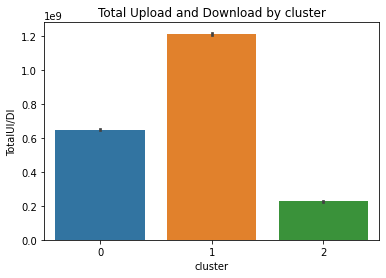

In [147]:
sns.barplot(df_task2['cluster'], df_task2['TotalUl/Dl'])
plt.title('Total Upload and Download by cluster');

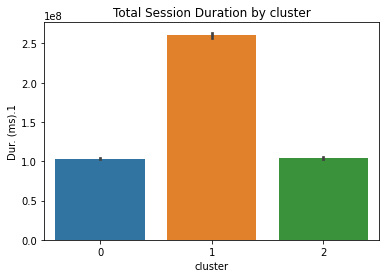

In [148]:
sns.barplot(df_task2['cluster'], df_task2['Dur. (ms).1'])
plt.title('Total Session Duration by cluster');

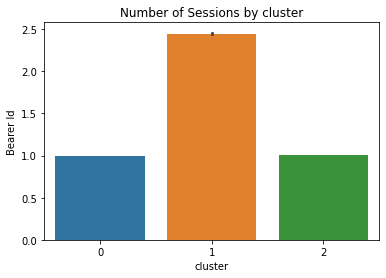

In [149]:
sns.barplot(df_task2['cluster'], df_task2['Bearer Id'])
plt.title('Number of Sessions by cluster');

Aggregate user total traffic per application and derive the top 10 most engaged
users per application

In [150]:
agg = df.groupby('MSISDN/Number')['Social','Google', 'Email', 'Youtube', 'Netflix', 'Gaming'].sum()

In [151]:
df_app_agg = pd.DataFrame(agg)
df_app_agg.reset_index(inplace = True); df_app_agg.head()

,MSISDN/Number,Social,Google,Email,Youtube,Netflix,Gaming
0,3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08
1,3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08
2,3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08
3,3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08
4,3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09


Most engaged users per application

In [152]:
## Top 10 Users with highest traffic per application
for cols in df_app_agg.columns[1:]:
  tmp = df_app_agg.sort_values(by =cols, ascending= False).head(10)[['MSISDN/Number', cols]]
  print(f'column: {cols} \n {tmp}\n')

column: Social 
         MSISDN/Number      Social
13526    3.362632e+10  43374779.0
92923    3.376054e+10  39783189.0
37052    3.365973e+10  35412358.0
6437     3.361489e+10  28294544.0
13180    3.362578e+10  27135500.0
65118    3.366716e+10  24247850.0
106137   3.378632e+10  23974919.0
70960    3.366907e+10  23800834.0
666      3.360313e+10  23077825.0
31331    3.365849e+10  23000066.0

column: Google 
         MSISDN/Number       Google
13526    3.362632e+10  152191852.0
13180    3.362578e+10  142307915.0
6437     3.361489e+10  127973787.0
92923    3.376054e+10  123223099.0
37052    3.365973e+10  116516345.0
106137   3.378632e+10  110254484.0
76363    3.367588e+10  109860502.0
65118    3.366716e+10  105032696.0
94654    3.376127e+10   97089988.0
86313    3.369876e+10   91935151.0

column: Email 
         MSISDN/Number       Email
13526    3.362632e+10  42418782.0
6437     3.361489e+10  40788634.0
13180    3.362578e+10  40633966.0
106137   3.378632e+10  36310123.0
37052    3.365973e+

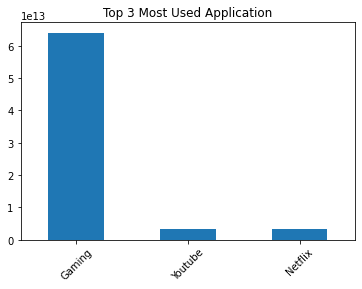

In [201]:
df_app_agg[df_app_agg.columns[1:]].sum().sort_values(ascending = False).head(3).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title("Top 3 Most Used Application");

Obtain the optimized value for k (number of clusters)

In [154]:
distortions = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 21, init= 'k-means++')
    kmeans.fit(df_task2_scaled)
    distortions.append(kmeans.inertia_)

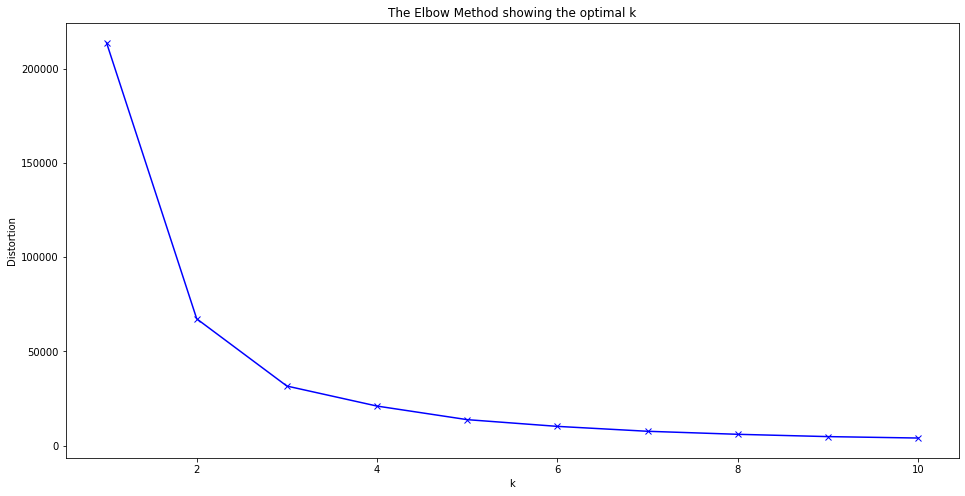

In [155]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k');

The optimized value for k is 3

# Experience Analytics

In [156]:
df['RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['TCP'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['TP'] = df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']

In [157]:
df['Handset Type'].head()

0     Samsung Galaxy A5 Sm-A520F
1    Samsung Galaxy J5 (Sm-J530)
2       Samsung Galaxy A8 (2018)
3                      undefined
4               Samsung Sm-G390F
Name: Handset Type, dtype: object

In [158]:
t2 = df.groupby('MSISDN/Number')['Handset Type'].unique()

In [159]:
t2.explode()

MSISDN/Number
3.360100e+10      Huawei P20 Lite Huawei Nova 3E
3.360100e+10              Apple iPhone 7 (A1778)
3.360100e+10                           undefined
3.360101e+10             Apple iPhone 5S (A1457)
3.360101e+10             Apple iPhone Se (A1723)
                              ...               
3.379000e+10                 Huawei Honor 9 Lite
3.379000e+10         Apple iPhone 8 Plus (A1897)
3.197021e+12    Quectel Wireless. Quectel Ec25-E
3.370000e+14                    Huawei B525S-23A
8.823971e+14    Quectel Wireless. Quectel Ec21-E
Name: Handset Type, Length: 106862, dtype: object

In [160]:
ts3 = df.groupby('MSISDN/Number').agg({'RTT':'sum','TP':'sum','TCP':'sum','Handset Type':'count'})

In [161]:
df_exp = pd.DataFrame(ts3)
df_exp.reset_index(inplace = True)

In [162]:
for cols in df_exp.columns[1:-1]:
  top, bottom,mode = df_exp[cols].value_counts().head(10), df_exp[cols].value_counts().tail(10), df_exp[cols].mode()[0]
  print(f'column: {cols} <-> most_freq: {mode}\n Top:\n {top}\n Bottom:\n {bottom} \n')

column: RTT <-> most_freq: 125.86197568270961
 Top:
 125.861976    16353
29.000000      2736
39.000000      2162
251.723951     1908
38.000000      1446
30.000000      1419
40.000000      1383
28.000000      1330
49.000000      1194
31.000000      1053
Name: RTT, dtype: int64
 Bottom:
 511.585927     1
689.447903     1
955.000000     1
2526.000000    1
1877.000000    1
1317.000000    1
1784.000000    1
1575.861976    1
925.723951     1
3220.000000    1
Name: RTT, dtype: int64 

column: TP <-> most_freq: 15.0
 Top:
 15.0    2685
63.0    2072
97.0    1023
90.0    1005
98.0     971
96.0     866
99.0     853
89.0     817
95.0     798
91.0     793
Name: TP, dtype: int64
 Bottom:
 18495.0     1
8096.0      1
125096.0    1
48845.0     1
90366.0     1
54805.0     1
16391.0     1
61959.0     1
32270.0     1
16627.0     1
Name: TP, dtype: int64 

column: TCP <-> most_freq: 21650430.771230917
 Top:
 2.165043e+07    47125
4.330086e+07     7468
6.495129e+07     1032
2.088548e+07      363
8.660172e+

The distribution of the average throughput per handset type and provide
interpretation for your findings.
 The average TCP retransmission view per handset type and provide
interpretation for your findings.

In [163]:
df.groupby('Handset Type')['TCP'].mean().reset_index().sort_values(by = 'TCP',ascending = False)[:10]

,Handset Type,TCP
584,Lg Lg-H635,9.125804e+08
324,Huawei Bln-Al10,3.291746e+08
142,Asustek Asus Zenfone Selfie Zd551Kl,3.216583e+08
972,Samsung Galaxy Tab S3 (Sm-T825),2.027976e+08
345,Huawei E5776S-32,1.688455e+08
29,Apple iPad Pro (A1652),1.281090e+08
899,Samsung Galaxy J8 2018,1.157583e+08
212,Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9,1.038712e+08
1336,Xiaomi Communica. Mi 6,7.538708e+07
341,Huawei E5573,7.146842e+07


In [164]:
df.groupby('Handset Type')['TP'].mean().reset_index().sort_values(by = 'TP',ascending = False)[:10]

,Handset Type,TP
321,Huawei B715S-23C,108994.230769
704,New-Bund Technol. Mix 2,105211.000000
573,Lg G6+,100135.000000
1391,Zyxel Communicat. Sbg3600,97351.000000
466,Huawei Y9 2019,91739.000000
1334,Xiaomi Communica. M1902F1G,85613.666667
1154,Spa Condor Elect. Allure M2,84311.500000
777,Ovvi-Cellphone T. Echo,78953.000000
424,Huawei Pele,78381.000000
1162,Spa Condor Elect. Plume L2,76529.000000


In [165]:
v = df_exp.groupby('Handset Type')['TP'].mean()

In [166]:

exp_dist = pd.DataFrame(v)
exp_dist.reset_index(inplace= True) ; exp_dist.head()

,Handset Type,TP
0,1,11425.392803
1,2,31864.672571
2,3,58128.847354
3,4,105804.324615
4,5,157585.699360


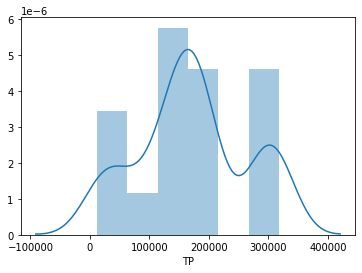

In [167]:
sns.distplot(exp_dist.TP);

In [168]:
v = df_exp.groupby('Handset Type')['TCP'].mean()
tcp_per_handset = pd.DataFrame(v)
tcp_per_handset.reset_index(inplace = True); tcp_per_handset.head()

,Handset Type,TCP
0,1,2.035971e+07
1,2,4.236506e+07
2,3,7.109090e+07
3,4,1.017288e+08
4,5,1.821244e+08


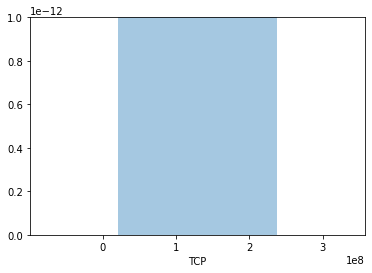

In [169]:
sns.distplot(tcp_per_handset.TCP);

In [170]:
P = PowerTransformer()
df_exp_scaled = P.fit_transform(df_exp[df_exp.columns[1:-1]])

In [171]:
kmeans_2 = KMeans(n_clusters = 3, random_state = 21)
kmeans_2.fit(df_exp_scaled)
df_exp['cluster'] = kmeans_2.labels_

In [172]:
#description per cluster
for i in range(3):
  print(f"cluster {i}: \n")
  for cols in df_exp.columns[1:-1]:
    if df_exp[cols].dtype == 'O':
      mode = df_exp[df_exp.cluster == i][cols].mode()[0]
      print(f'column: {cols}\n mode: {mode}\n')
    else:
      min, max = df_exp[df_exp.cluster == i][cols].min(), df_exp[df_exp.cluster == i][cols].max()
      avg, total = df_exp[df_exp.cluster == i][cols].mean(), df_exp[df_exp.cluster == i][cols].sum()
      print(f'column: {cols}\n min: {min} <-> max: {max} \n average: {avg} <-> total: {total}\n')

cluster 0: 

column: RTT
 min: 0.0 <-> max: 6175.0 
 average: 77.7811199741498 <-> total: 4167279.0648537343

column: TP
 min: 0.0 <-> max: 67524.0 
 average: 254.7827612594957 <-> total: 13650496.0

column: TCP
 min: 766255.4961037483 <-> max: 269989272.0 
 average: 24130419.897788838 <-> total: 1292835506863.3616

column: Handset Type
 min: 1 <-> max: 4 
 average: 1.1233178416111391 <-> total: 60184

cluster 1: 

column: RTT
 min: 19.0 <-> max: 27278.0 
 average: 200.50829790666427 <-> total: 5155469.355776146

column: TP
 min: 26.0 <-> max: 382871.0 
 average: 31302.756728375854 <-> total: 804856481.0

column: TCP
 min: 97.0 <-> max: 16896851.0 
 average: 1214929.7144834793 <-> total: 31238272818.796436

column: Handset Type
 min: 1 <-> max: 8 
 average: 1.0874299937772247 <-> total: 27960

cluster 2: 

column: RTT
 min: 27.0 <-> max: 96924.0 
 average: 341.80378451319956 <-> total: 9422504.927674476

column: TP
 min: 3.0 <-> max: 902222.0 
 average: 51656.00340987412 <-> total: 142

# Satisfaction Analysis

In [173]:
df_task2.head()

,MSISDN/Number,Bearer Id,Dur. (ms).1,TotalUl/Dl,cluster
0,3.360100e+10,1,116720140.0,8.786906e+08,0
1,3.360100e+10,1,181230963.0,1.568596e+08,2
2,3.360100e+10,1,134969374.0,5.959665e+08,0
3,3.360101e+10,1,49878024.0,4.223207e+08,0
4,3.360101e+10,2,37104453.0,1.457411e+09,1


In [174]:
kmeans_1.cluster_centers_

array([[ 0.        , -0.61141898,  0.        ,  0.13427976],
       [ 0.        ,  1.63203223,  0.        ,  1.00744632],
       [ 0.        , -0.601852  ,  0.        , -1.27553455]])

In [175]:
from scipy.spatial import distance
engagement_score = []
centroids_1 = kmeans_1.cluster_centers_[:,2]
for i in df_task2.index:
    idx = df_task2.iloc[i][1]
    engagement_score.append(distance.euclidean(idx, centroids_1))

In [176]:
engagement_score[:3]

[1.7320508075688772, 1.7320508075688772, 1.7320508075688772]

In [177]:
kmeans_2.cluster_centers_

array([[-0.44794947, -0.86401946,  0.3711895 ],
       [ 0.06624948,  0.84011596, -1.46684595],
       [ 0.81052947,  0.89778031,  0.64767161]])

In [178]:
experience_score = []
centroids_2 = kmeans.cluster_centers_[0,:]
for i in df_exp.index:
    idx = df_exp.iloc[i][1]
    experience_score.append(distance.euclidean(idx, centroids_2))

In [179]:
experience_score[:3]

[91.01428949816639, 61.01887138700583, 250.73230442784921]

In [180]:
df_exp['MSISDN/Number'].head()

0    3.360100e+10
1    3.360100e+10
2    3.360100e+10
3    3.360101e+10
4    3.360101e+10
Name: MSISDN/Number, dtype: float64

In [181]:
train_df = pd.DataFrame(columns = ['exp_score', 'eng_score'])

In [182]:
train_df['eng_score'] = engagement_score
train_df['exp_score'] = experience_score
train_df['MSISDN/Number'] = df_exp['MSISDN/Number']

In [183]:
train_df['sat_score'] = (train_df.exp_score+ + train_df.eng_score) /2

In [184]:
train_df.head()

,exp_score,eng_score,MSISDN/Number,sat_score
0,91.014289,1.732051,3.360100e+10,46.373170
1,61.018871,1.732051,3.360100e+10,31.375461
2,250.732304,1.732051,3.360100e+10,126.232178
3,167.010049,1.732051,3.360101e+10,84.371050
4,237.008549,3.464102,3.360101e+10,120.236325


Top 10 Satisfied Customers

In [185]:
train_df.sort_values(by = 'sat_score', ascending = False, ignore_index= True)[['MSISDN/Number', 'sat_score']].head(10)

,MSISDN/Number,sat_score
0,3.366232e+10,96924.368513
1,3.366087e+10,64671.234539
2,3.368369e+10,54848.368514
3,3.369855e+10,46022.234541
4,3.376181e+10,37086.966593
5,3.366879e+10,36305.234542
6,3.376094e+10,27278.368518
7,3.360679e+10,26300.368519
8,3.367182e+10,25715.368519
9,3.378187e+10,25388.368519


predict satisfaction score using regression

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [187]:
X = train_df.drop(['MSISDN/Number', 'sat_score'], axis = 1)
y = train_df.sat_score

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 9)

In [189]:
X_train.shape, X_test.shape

((74799, 2), (32057, 2))

In [190]:
rf =RandomForestRegressor(random_state= 10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [191]:
r2_score(y_train, rf.predict(X_train)), r2_score(y_test, rf.predict(X_test))

(0.9966467906294947, 0.888439940289608)

0.89 r2 score on the test set.

In [192]:
P = PowerTransformer()
train_scaled = P.fit_transform(train_df[train_df.columns[:2]])

In [193]:
kmeans = KMeans(2, random_state=3)
kmeans.fit(train_scaled)
train_df['cluster'] = kmeans.labels_

In [202]:
train_df.groupby('cluster')['exp_score', 'sat_score'].mean()

,exp_score,sat_score
cluster,,
0,244.532285,123.132168
1,627.763852,315.988766


export to sql

In [195]:
import sqlite3

conn = sqlite3.connect('user_scoreDB.db')
cursor = conn.cursor()

In [197]:
cursor.execute('CREATE TABLE metric_score (id, Engagement_Score, Experience_Score, Satisfaction_Score)')
conn.commit()

In [198]:
train_df.drop('cluster', axis = 1).to_sql('id', conn, if_exists='replace', index=False)
print('Completed.!!!')

Completed.!!!


In [199]:
cursor.execute("""select * from id""")

In [200]:
conn.close()
print('Succesfully Closed')

Succesfully Closed
